In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from wordcloud import WordCloud
from operator import itemgetter
%matplotlib inline 
data = pd.read_csv('tmdb_5000_movies.csv')


from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 


In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
subset_format = movies[['original_title', 'vote_average', 'vote_count']]
final_format1 = subset_format.sort_values(by = 'vote_count', ascending = False).head(10)
final_format1

,original_title,vote_average,vote_count
96,Inception,8.1,13752
65,The Dark Knight,8.2,12002
0,Avatar,7.2,11800
16,The Avengers,7.4,11776
788,Deadpool,7.4,10995
95,Interstellar,8.1,10867
287,Django Unchained,7.8,10099
94,Guardians of the Galaxy,7.9,9742
426,The Hunger Games,6.9,9455
127,Mad Max: Fury Road,7.2,9427


In [4]:
final_format2 = subset_format[subset_format['vote_count'] > 4000]
final_format2 = final_format2.sort_values(by = 'vote_average', ascending = False).head(10)

final_format2

,original_title,vote_average,vote_count
1881,The Shawshank Redemption,8.5,8205
3337,The Godfather,8.4,5893
3865,Whiplash,8.3,4254
1818,Schindler's List,8.3,4329
662,Fight Club,8.3,9413
3232,Pulp Fiction,8.3,8428
690,The Green Mile,8.2,4048
65,The Dark Knight,8.2,12002
809,Forrest Gump,8.2,7927
1990,The Empire Strikes Back,8.2,5879


In [5]:
ylabel1 = pd.Series(final_format1.sort_values(by = 'vote_count', ascending = True)['original_title']).tolist()
ylabel2 = pd.Series(final_format2.sort_values(by = 'vote_average', ascending = True)['original_title']).tolist()

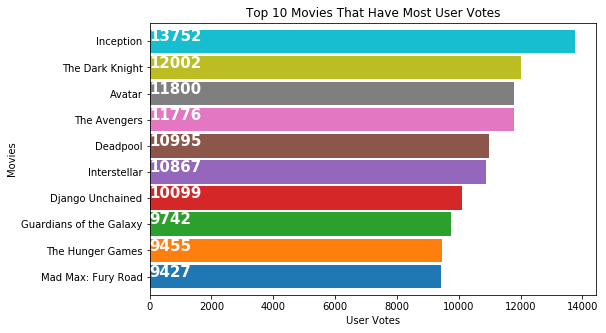

In [9]:
dataGdf = pd.DataFrame(final_format1['vote_count'])
dataGdf = dataGdf.reset_index(drop = True)

dataGdf['vote_count'].head()

ax = pd.Series(dataGdf['vote_count'])
ax.describe()

ax2 = ax.sort_values(ascending = False)[0:10]
ax2 = ax2.sort_values(ascending = True)

plt.subplots(figsize = (8,5))   

ax3 = ax2.plot(kind = 'barh',width = 0.9)
ax3.set_yticklabels(ylabel1)

for i, v in enumerate(ax2.values): 
    ax3.text(2, i, v, fontsize = '15', color = 'white', weight = 'bold')

plt.title('Top 10 Movies That Have Most User Votes')
plt.xlabel('User Votes')
plt.ylabel('Movies')
plt.savefig('top10_user_votes.jpg', bbox_inches = 'tight')
plt.show()

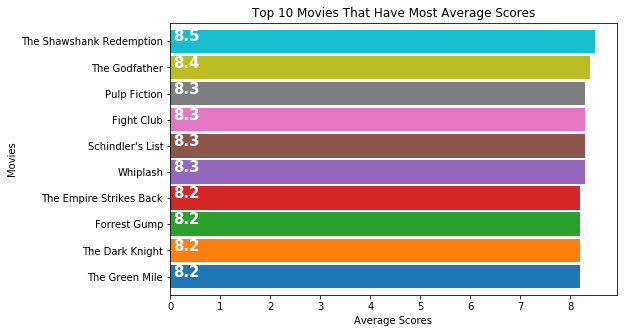

In [10]:
dataGdf = pd.DataFrame(final_format2['vote_average'])
dataGdf = dataGdf.reset_index(drop = True)

dataGdf['vote_average'].head()

ax = pd.Series(dataGdf['vote_average'])
ax.describe()

ax2 = ax.sort_values(ascending = False)[0:10]
ax2 = ax2.sort_values(ascending = True)

plt.subplots(figsize = (8,5))   

ax3 = ax2.plot(kind = 'barh',width = 0.9)
ax3.set_yticklabels(ylabel2)

for i, v in enumerate(ax2.values):
    ax3.text(0.05, i, v, fontsize = '15', color = 'white', weight = 'bold')

plt.title('Top 10 Movies That Have Most Average Scores')
plt.xlabel('Average Scores')
plt.ylabel('Movies')
plt.savefig('top10_avg_votes.jpg', bbox_inches = 'tight')
plt.show()

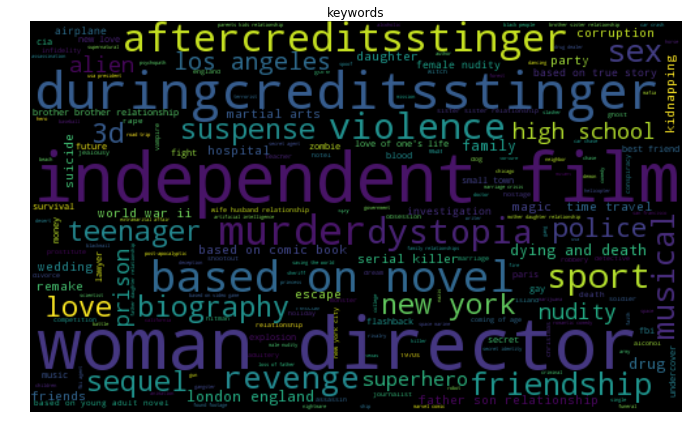

In [2]:
list1 = [] #list of dictionaries
list2 = [] #dictionaries
list3 = [] #list of frequencies of each category
counter = 0 
i = 0 
wordcloud = WordCloud(width=500, height=300)

for each in data.keywords:
    list1.append(ast.literal_eval(each))

for each in list1:
    for each2 in each:
        list2.append(each2)

newlist = sorted(list2, key=lambda k: k['id'])

while i < len(newlist)-1:
    if newlist[i].get('id') == newlist[i+1].get('id'):
        counter += 1
        i += 1
    else:
        list3.append([newlist[i].get('name'),counter])
        counter = 0
        i += 1
        
#for each in list2:
#    list3.append(each['id'])

list3

df1 = pd.DataFrame(list3, columns = ['genre', 'freq'])

d = {}
for a, x in df1.values:
    d[a] = x


wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(15,7) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("keywords")
plt.show()

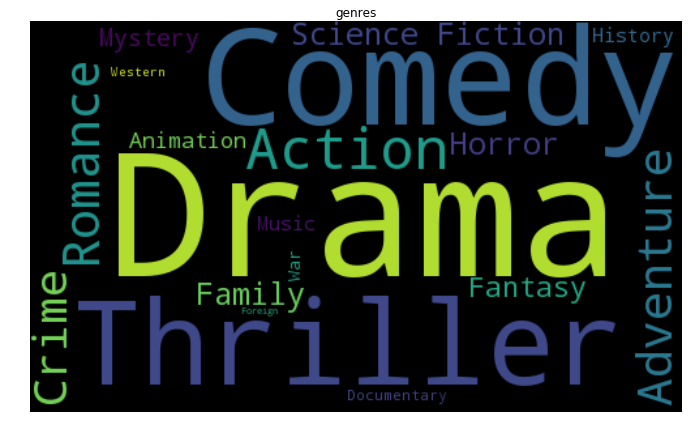

In [3]:
list1 = [] #list of dictionaries
list2 = [] #dictionaries
list3 = [] #list of frequencies of each category
counter = 0 
i = 0 
wordcloud = WordCloud(width=500, height=300)

for each in data.genres:
    list1.append(ast.literal_eval(each))

for each in list1:
    for each2 in each:
        list2.append(each2)

newlist = sorted(list2, key=lambda k: k['id'])

while i < len(newlist)-1:
    if newlist[i].get('id') == newlist[i+1].get('id'):
        counter += 1
        i += 1
    else:
        list3.append([newlist[i].get('name'),counter])
        counter = 0
        i += 1
        
#for each in list2:
#    list3.append(each['id'])

list3

df1 = pd.DataFrame(list3, columns = ['genre', 'freq'])

d = {}
for a, x in df1.values:
    d[a] = x


wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(15,7) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("genres")
plt.show()

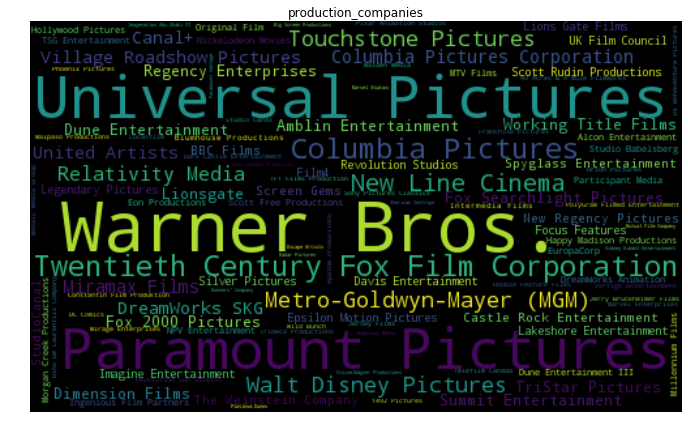

In [4]:
list1 = [] #list of dictionaries
list2 = [] #dictionaries
list3 = [] #list of frequencies of each category
counter = 0 
i = 0 
wordcloud = WordCloud(width=500, height=300)

for each in data.production_companies:
    list1.append(ast.literal_eval(each))

for each in list1:
    for each2 in each:
        list2.append(each2)

newlist = sorted(list2, key=lambda k: k['id'])

while i < len(newlist)-1:
    if newlist[i].get('id') == newlist[i+1].get('id'):
        counter += 1
        i += 1
    else:
        list3.append([newlist[i].get('name'),counter])
        counter = 0
        i += 1
        
#for each in list2:
#    list3.append(each['id'])

list3

df1 = pd.DataFrame(list3, columns = ['genre', 'freq'])

d = {}
for a, x in df1.values:
    d[a] = x


wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(15,7) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("production_companies")
plt.show()

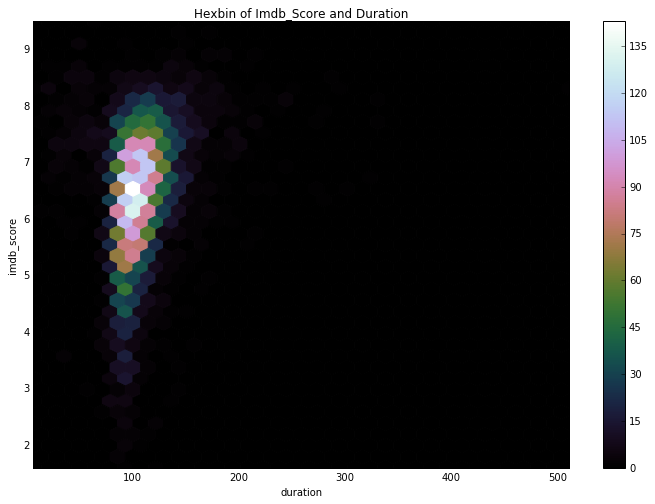

In [6]:
movie = pd.read_csv('movie_metadata - Copy.csv')
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in movie.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = movie.columns.difference(str_list) 
movie_num = movie[num_list]
#del movie # Get rid of movie df as we won't need it now
movie_num.head()
movie_num = movie_num.fillna(value=0, axis=1)
X = movie_num.values
# Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
movie.plot(y= 'imdb_score', x ='duration',kind='hexbin',gridsize=35, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Duration',figsize=(12,8))


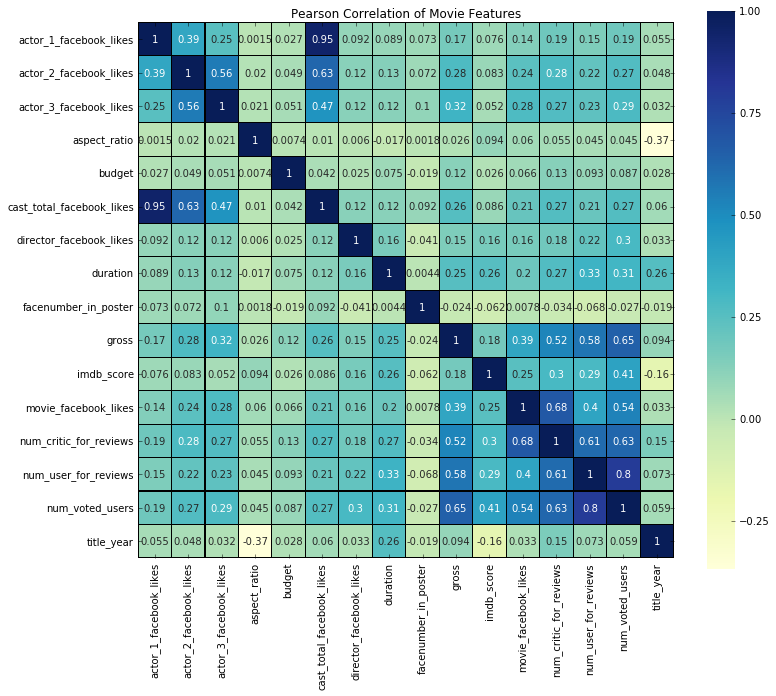

In [7]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Movie Features')
# Draw the heatmap using seaborn
sns.heatmap(movie_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [8]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

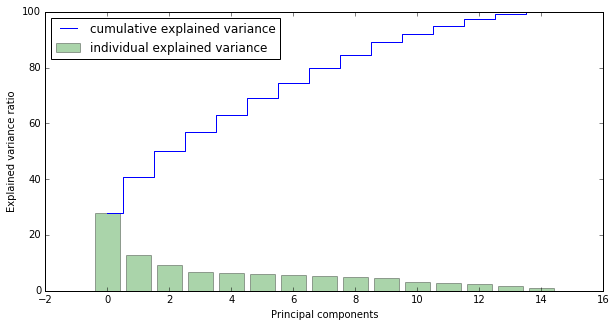

In [9]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(16), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(16), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

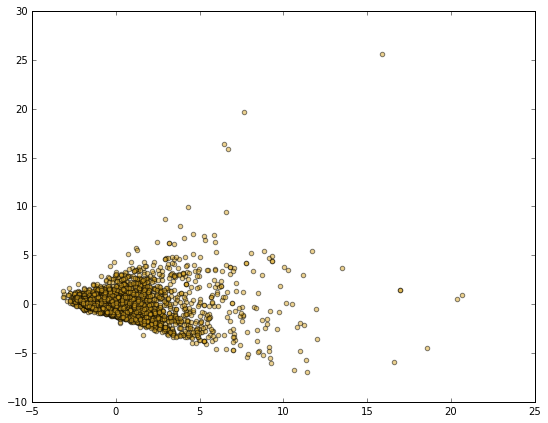

In [10]:
pca = PCA(n_components=9)
x_9d = pca.fit_transform(X_std)
plt.figure(figsize = (9,7))
plt.scatter(x_9d[:,0],x_9d[:,1], c='goldenrod',alpha=0.5)
plt.ylim(-10,30)
plt.show()

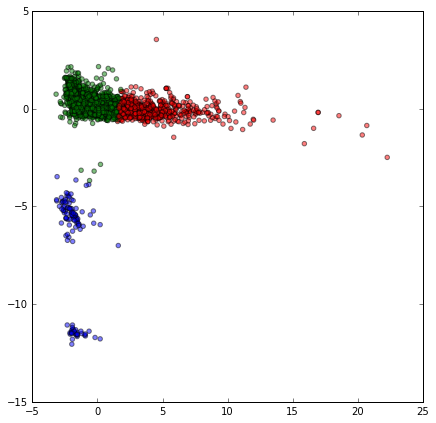

In [11]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,2], c= label_color, alpha=0.5) 
plt.show()

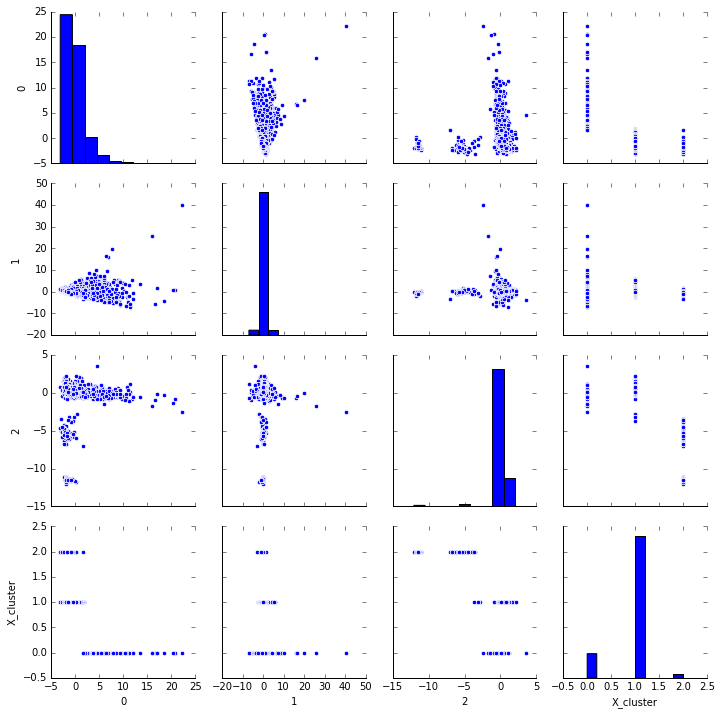

In [21]:
# a 3 dim vis
# Create a temp dataframe from our PCA projection data "x_9d"
df = pd.DataFrame(x_9d)
df = df[[0,1,2]] # only want to visualise relationships between first 3 projections
df['X_cluster'] = X_clustered
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns.pairplot(df)

In [23]:
data = pd.read_csv('Movie_metadata.csv')

In [26]:
df =data.drop(['gross','budget'],axis=1).dropna(axis=0)
df = pd.concat([df,data.loc[df.index,['gross','budget']]],axis=1)
df.reset_index(drop=True,inplace=True)

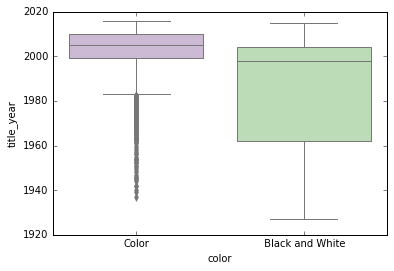

In [27]:
sns.boxplot(x="color", y="title_year", data=df, palette="PRGn")

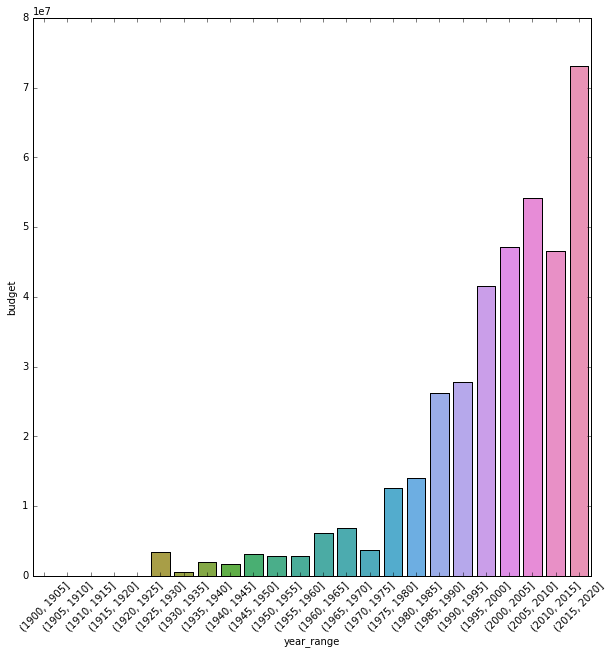

In [29]:
cut = pd.cut(df.imdb_score, bins=list(np.arange(1,11)))

cut2 = pd.cut(df.title_year, bins=list(5*(np.arange(380,405))))

cut3 = pd.cut(df.imdb_score, bins=list([0,4,6,7,8,10]))
df['imdb_score_bin'] =cut

df['year_range'] =cut2
df['pc_imdb'] = cut3

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['pc_imdb']= le.fit_transform(df['pc_imdb'])
fig, ax = plt.subplots(figsize=(10,10))
plt.xticks(rotation=45)
sns.barplot(df['year_range'],df['budget'],ci=None)
sns.barplot(df['year_range'],df['budget'],ci=None)

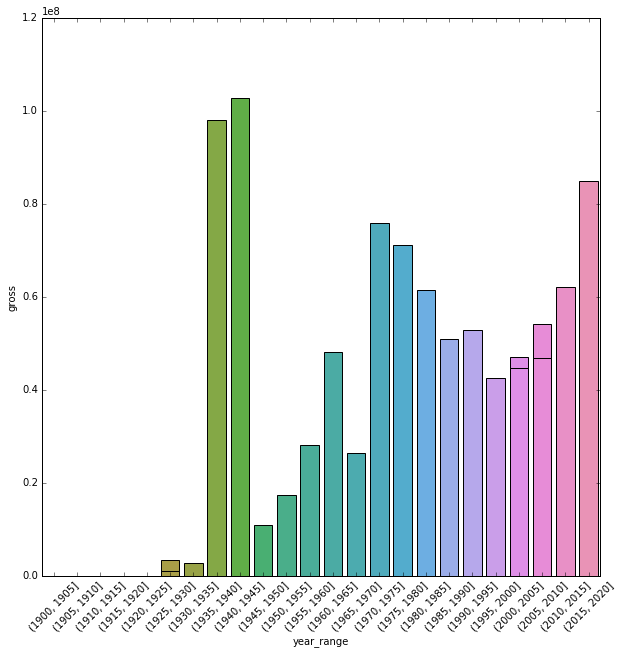

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
plt.xticks(rotation=45)
sns.barplot(df['year_range'],df['budget'],ci=None)
sns.barplot(df['year_range'],df['gross'],ci=None)

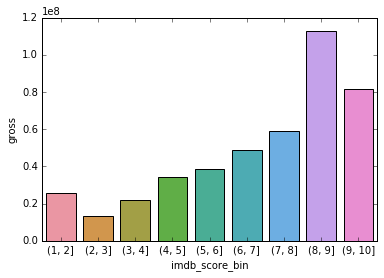

In [31]:
sns.barplot(df['imdb_score_bin'],df['gross'],ci=None)

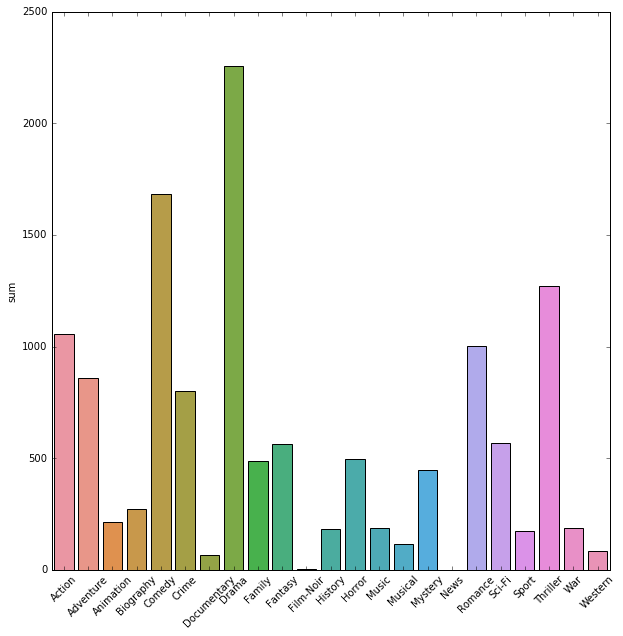

In [39]:
df_genre=df['genres'].str.split('|',expand=True).stack().str.get_dummies().sum(level=0)

fig, ax = plt.subplots(figsize=(10,10))
plt.xticks(rotation=45)
k=pd.DataFrame(df_genre.sum(),columns=['sum'])
sns.barplot(y='sum',x=k.index,data=k,orient='v')